# GaussianMixture

- Un modelo de mezcla de gaussianas (GMM) es un **modelo probabilístico** que supone que las instancias se generaron a partir de una mezcla de varias distribuciones gaussianas cuyos parámetros se desconocen.

- Todas las instancias generadas a partir de una única distribución gaussiana forman un cluster que suele parecerse a un elipsoide.

- Cuando se observa una instancia, se sabe que se ha generado a partir de una de las distribuciones gaussianas, pero no se sabe cuál de ellas ni cuáles son sus parámetros.

- En la variante más sencilla de mezclas gaussianas, se debe conocer de antemano el número *k* de distribuciones gaussianas. Se supone que el conjunto de datos X se ha generado mediante el siguiente proceso probabilístico:

- Para cada instancia, se elige aleatoriamente un cluster de entre *k* clusters. La probabilidad de elegir el k-ésimo cluster viene definida por el peso del cluster $\pi_k$. El índice del cluster elegido para la i-ésima instancia se denomina $z_i$.

- Si $z_i=k$, lo que significa que la i-ésima instancia ha sido asignada al *k*-ésimo clúster, la ubicación $x_i$ de esta instancia se muestrea aleatoriamente a partir de la distribución gaussiana con media $μ_k$ y matriz de covarianza $Σ_k$. Esto se denota como  $\mathcal{N}(x_i| \mu_k, \Sigma_k)$.

El algoritmo que se usa para estimar los pesos, media y matrices de covarianza de los clusters es el algoritmo de Esperanza-maximización.

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [2]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2] #vstack
y = np.r_[y1, y2]

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

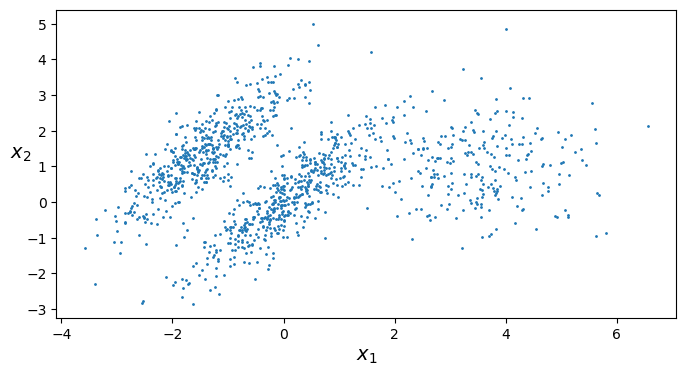

In [4]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [5]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [6]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [7]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [8]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

**Converge el algoritmo?**

In [9]:
gm.converged_

True

**Cuántas iteraciones realiza?**

In [10]:
gm.n_iter_

4

In [17]:
#hard clustering
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

Te dice a que cluster pertenece

In [12]:
#soft clustering
gm.predict_proba(X).round(3)

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

Te devuelve la probabilidad de pertenencia a un cluster.

El primero pertence al 0 porque tenemos un 97% de probabilidad.

**Tenemos un modelo generativo, por tanto, podemos muestrear instancias nuevas de nuestro modelo y obtener sus etiquetas**

In [18]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [19]:
y_new

array([0, 0, 1, 2, 2, 2])

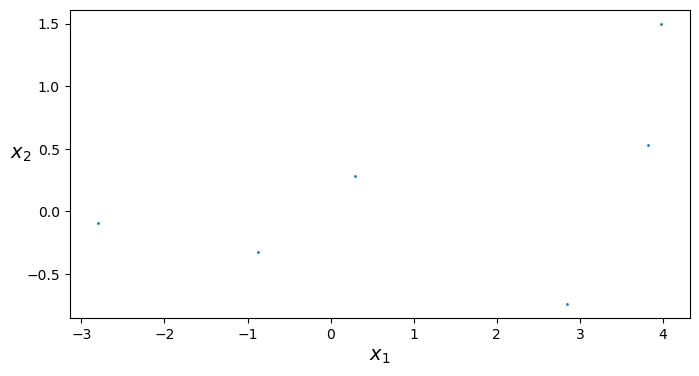

In [20]:
plt.figure(figsize=(8, 4))
plot_clusters(X_new)
plt.show()

**también se puede obtener el log de la función de densidad de probabilidad (pdf)**

Cuanto más grande el valor, mayor densidad de probabilidad

In [21]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

Si se calcula la exponencial a estos resultados, se obtiene el valor de la PDF en la ubicación de las instancias dadas. No se obtienen probabilidades, sino densidades de probabilidad: pueden tomar cualquier valor positivo, no sólo valores entre 0 y 1. Para estimar la probabilidad de que una instancia se encuentre dentro de una región concreta, habría que integrar la PDF sobre esa región (si se hace sobre todo el espacio de posibles ubicaciones de las instancias, el resultado será 1).

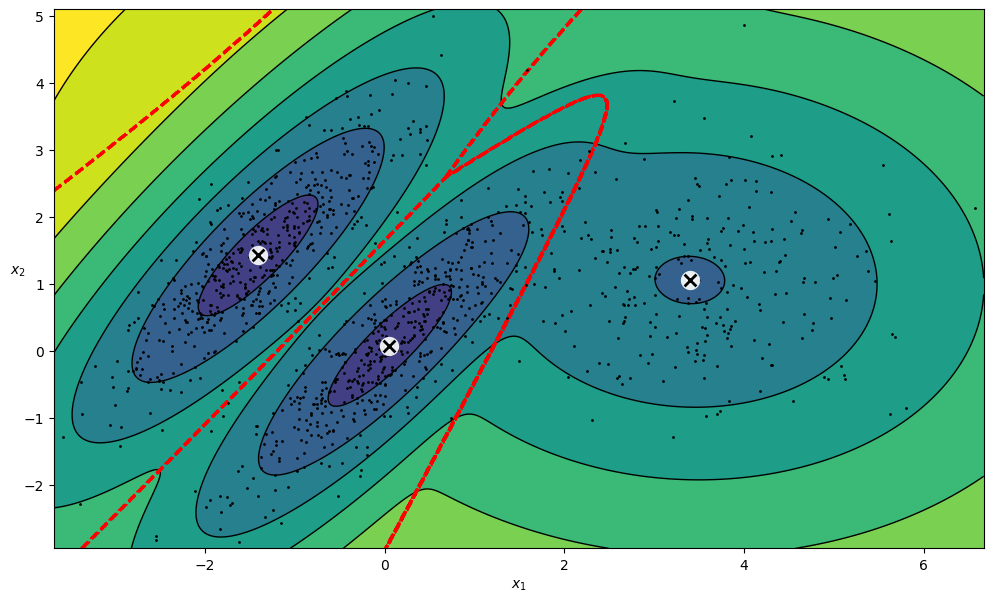

In [22]:
from utiles import plot_gaussian_mixture

plt.figure(figsize=(12, 7))
plot_gaussian_mixture(gm, X)
plt.show()

**La gráfica muestra las medias de los clusters, los límites de decisión (líneas rojas) y las curvas de contornos de la densidad de puntos.**

En el ejemplo anterior, hemos facilitado la tarea generando los datos con un conjunto de distribuciones gaussianas en 2D. También, le dimos al algoritmo el número correcto de clusters. Cuando se tienen muchas dimensiones, o muchos clusters, o pocas instancias, el algoritmo EM puede tener dificultades para converger a la solución óptima. Puede ser necesario reducir la dificultad de la tarea limitando el número de parámetros que el algoritmo tiene que aprender. Una forma de hacerlo es limitar las formas y orientaciones que pueden tener los clusters. Esto se consigue imponiendo restricciones a las matrices de covarianza.

Se puede establecer el parámetro `covariance_type` en uno de los siguientes valores:

**"spherical"**

Todos los clusters son esféricos pero pueden tener diámetros diferentes.

**"diag"**

Los clusters pueden tener forma cualquier forma elipsoidal y de cualquier tamaño pero sus ejes deben ser paralelos a los ejes coordenados (las matrices de covarianza son diagonales).

**"tied"**

Todos los clusters deben tener la misma forma elipsoidal, tamaño y orientación (todos los clusters comparten igual matriz de covarianza).

Por defecto, este parámetro es igual a **"full""**, es decir que cada cluster puede tomar cualquier forma, tamaño y orientación (tienen su propia matriz de covarianza sin restricciones)

In [ ]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)

gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)

gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)

gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)

gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

plt.figure(figsize=(15, 10))

plt.subplot(221)
plot_gaussian_mixture(gm_tied, X)
plt.title(f'covariance_type="{gm_tied.covariance_type}"')

plt.subplot(222)
plot_gaussian_mixture(gm_spherical, X, show_ylabels=False)
plt.title(f'covariance_type="{gm_spherical.covariance_type}"')

plt.subplot(223)
plot_gaussian_mixture(gm_full, X)
plt.title(f'covariance_type="{gm_full.covariance_type}"')

plt.subplot(224)
plot_gaussian_mixture(gm_diag, X, show_ylabels=False)
plt.title(f'covariance_type="{gm_diag.covariance_type}"')

# Detección de anomalías usando GMM

Utilizar un modelo de mezcla de gaussianas para la detección de anomalías es bastante sencillo: cualquier instancia situada en una región de baja densidad puede considerarse una anomalía. Se bebe definir qué umbral de densidad desea utilizar.

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
print(density_threshold)
anomalies = X[densities < density_threshold]

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')

plt.show()

# Selección del número de clusters

No podemos utilizar la inercia o el coeficiente de silueta porque ambas suponen que los clusters son esféricos. En su lugar, podemos intentar encontrar el modelo que minimice un criterio de información teórico como el Criterio de Información Bayesiano (BIC) o el Criterio de Información de Akaike (AIC):

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ es el número de instancias.
* $p$ es el número de parámetros aprendidos por el modelo.
* $\hat L$ es el valor máximo de la función de verosimilitud del modelo.

In [ ]:
gm.bic(X)

In [ ]:
gm.aic(X)

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Criterio de Información")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Mínimo", horizontalalignment="center")
plt.legend()
plt.grid()
plt.show()